# Differentiable Boltzmann Code

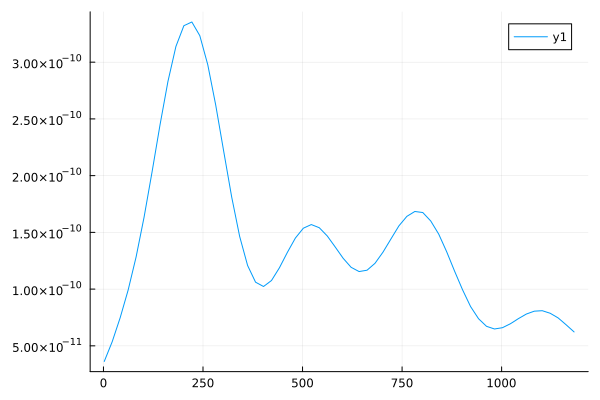

In [1]:
using Bolt, Plots

# Assign cosmological parameters
ùï° = CosmoParams(Œ©_c = 0.3) # set kwargs like so to change the default values
# Compute expansion history quantities
bg = Background(ùï°)
# Compute ionization history (via RECFAST)
ùï£ = Bolt.RECFAST(bg=bg, Yp=ùï°.Y_p, OmegaB=ùï°.Œ©_b)
ih = IonizationHistory(ùï£, ùï°, bg)

# Matter power spectrum
kmin,kmax,nk = 10bg.H‚ÇÄ,5000bg.H‚ÇÄ,32
ks = log10_k(kmin,kmax,nk) # k grid
pL = [plin(k,ùï°,bg,ih) for k in ks]
p1 = plot(ks, vcat(pL...), xscale=:log10, yscale=:log10)


# CMB C·µÄ·µÄ(‚Ñì)
‚Ñìmin,‚Ñìmax,n‚Ñì = 2,20,1200
‚Ñìs = ‚Ñìmin:‚Ñìmax:n‚Ñì
kmin,kmax,nk = 0.1bg.H‚ÇÄ, 1000bg.H‚ÇÄ, 100
ks = quadratic_k(kmin,kmax,nk)
sf = source_grid(ùï°, bg, ih, ks, BasicNewtonian()) # set up LOS source function interpolator
C·µÄ·µÄ = cltt(‚Ñìs, ùï°, bg, ih, sf)
p2 = plot(‚Ñìs, @.(‚Ñìs^2*C·µÄ·µÄ))

# References
- [ ] [basic_usage.jl](https://github.com/xzackli/Bolt.jl/blob/main/examples/basic_usage.jl)